In [ ]:
# it is used to partition data into k clusters
# non overlaping cluster (independent cluster)
# clusted formed using elucedian distance
# eqch cluster is repersented by its centre point

# Example: Customer Segmentation for a Retail Company 🛍️
# Business Context
# A retail chain wants to understand its customers better. Instead of treating everyone the same,
# they want to group customers into segments (like “budget shoppers,” “loyal premium buyers,” etc.)
#  so they can:
# - Personalize marketing campaigns
# - Recommend products more effectively
# - Improve customer retention

# Dataset (simplified)
# Imagine we have customer data with features like:
# - Annual Income (numeric)
# - Spending Score (numeric, based on purchase behavior)
# - Age (numeric)

In [7]:
import pandas as pd
import numpy as np

# For reproducibility
np.random.seed(42)

# Generate 100 customers
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 60, 100),                 # Age between 18 and 60
    'AnnualIncome': np.random.randint(20000, 100000, 100), # Income between 20k and 100k
    'SpendingScore': np.random.randint(1, 100, 100)        # Score between 1 and 100
}

df = pd.DataFrame(data)

# print(df.head())
# print("\nTotal Records:", len(df))

    CustomerID  Age  AnnualIncome  SpendingScore  cluster
0            1   56         28392             19        1
1            2   46         50535             20        0
2            3   32         98603             96        2
3            4   25         72256             71        2
4            5   38         55222             52        1
..         ...  ...           ...            ...      ...
95          96   59         69811              4        0
96          97   56         22811             35        1
97          98   58         76250             64        2
98          99   45         92082             49        2
99         100   24         54754             17        0

[100 rows x 5 columns]


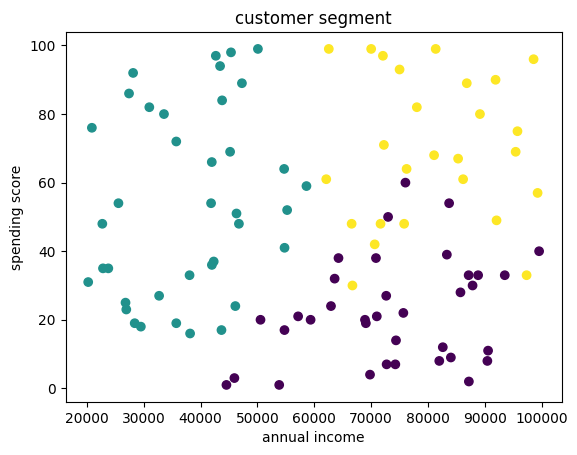

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# # load data
# data = {
#     'CustomerID': [1,2,3,4,5,6],
#     'Age': [25,45,35,23,52,40],
#     'AnnualIncome': [25000,60000,40000,20000,80000,50000],
#     'SpendingScore': [30,70,50,20,90,60]
# }

# df=pd.DataFrame(data)

# select features for clustring
x=df[["Age","AnnualIncome","SpendingScore"]]

#scalar features
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# Apply K mean
kmeans=KMeans(n_clusters=3,random_state=42)
df["cluster"]=kmeans.fit_predict(x_scaled)

# inspect result
print(df)

#  visualise clusetrs
plt.scatter(df["AnnualIncome"],df["SpendingScore"],c=df["cluster"],cmap="viridis")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.title("customer segment")
plt.show()    


# Example: Hospital Patient Segmentation 🏥
# Business Context
# A hospital wants to improve patient care and resource allocation. Instead of treating all
# patients the same, they want to group them into segments based on health and lifestyle data.
#  This helps with:
# - Designing personalized treatment plans
# - Predicting high‑risk patients
# - Managing hospital resources more efficiently

# Dataset (simplified)
# Features we might use:
# - Age
# - BMI (Body Mass Index)
# - Number of yearly hospital visits
# - Chronic conditions count

   PatientID  Age  BMI  HospitalVisits  ChronicConditions  cluster
0        101   25   22               1                  0        2
1        102   60   30               5                  2        3
2        103   45   28               3                  1        0
3        104   30   24               2                  0        2
4        105   70   35               7                  3        1
5        106   50   27               4                  1        0


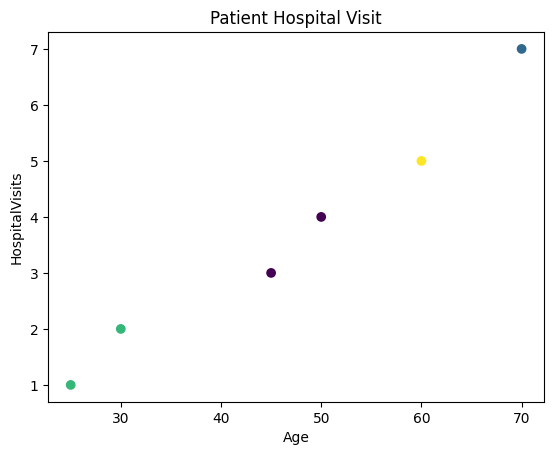

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = {
    'PatientID': [101,102,103,104,105,106],
    'Age': [25,60,45,30,70,50],
    'BMI': [22,30,28,24,35,27],
    'HospitalVisits': [1,5,3,2,7,4],
    'ChronicConditions': [0,2,1,0,3,1]
}
df=pd.DataFrame(data)

x=df[["Age","BMI","HospitalVisits","ChronicConditions"]]

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

kmeans=KMeans(n_clusters=4, random_state=42)
df["cluster"]=kmeans.fit_predict(x_scaled)

print(df)

plt.scatter(df["Age"],df["HospitalVisits"],c=df["cluster"],cmap="viridis")
plt.xlabel("Age")
plt.ylabel("HospitalVisits")
plt.title("Patient Hospital Visit")
plt.show()    


# we can determine the value of number of cluster by
# elbow method
# Silhouette Score

# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill
# amount, average call duration, internet usage, and number of support calls. The company wants
# to group customers into meaningful segments to design targeted marketing campaigns and improve customer
#  service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated
# and meaningful groups.


# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill amount, average call duration, internet usage, and number of support calls. The company wants to group customers into meaningful segments to design targeted marketing campaigns and improve customer service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated and meaningful groups

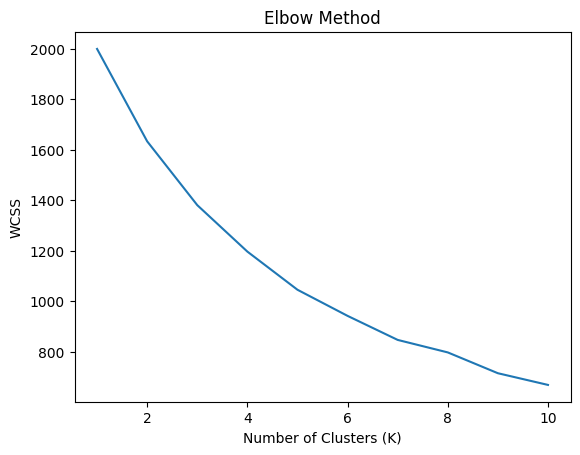

K = 2, Silhouette Score = 0.17919767345398516
K = 3, Silhouette Score = 0.17813841436750533
K = 4, Silhouette Score = 0.19038730351663488
K = 5, Silhouette Score = 0.2009370395813824
K = 6, Silhouette Score = 0.20361416547964986
K = 7, Silhouette Score = 0.21069592820436994
K = 8, Silhouette Score = 0.20253205360205617
K = 9, Silhouette Score = 0.2173655702369783
K = 10, Silhouette Score = 0.2132628006347711


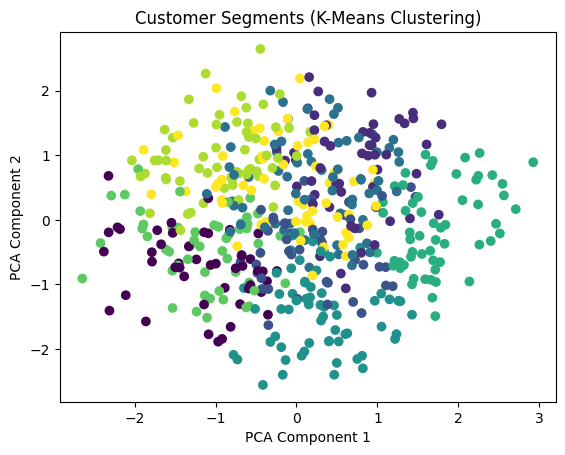

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Create synthetic dataset
np.random.seed(42)

data = {
    'CustomerID': range(1, 501),
    'MonthlyBill': np.random.randint(20, 200, 500),
    'CallDuration': np.random.randint(50, 500, 500),
    'InternetUsage': np.random.randint(10, 300, 500),
    'SupportCalls': np.random.randint(0, 10, 500)
}

df = pd.DataFrame(data)

X = df[['MonthlyBill', 'CallDuration', 'InternetUsage', 'SupportCalls']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K = {k}, Silhouette Score = {score}")


kmeans = KMeans(n_clusters=9, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments (K-Means Clustering)")
plt.show()

# 🎬 Scenario: Movie Streaming Platform
# A movie streaming company has collected data on 1,000 users, including:
# - Average watch time per week
# - Preferred genres (action, comedy, drama, etc.)
# - Number of devices used (TV, phone, tablet)
# - Frequency of subscription pauses or cancellations
# The company wants to group users into meaningful segments to:
# - Recommend personalized movie lists
# - Design loyalty rewards for binge‑watchers
# - Identify users at risk of canceling subscriptions
# Your Tasks
# - Apply K‑Means clustering to explore possible user segments.
# - Example clusters: “Weekend binge‑watchers,” “Casual family viewers,” “Genre loyalists.”
# - Use the Elbow Method to find the point where adding more clusters doesn’t improve grouping much.
# - This helps decide whether 3, 4, or 5 clusters make sense.
# - Validate with Silhouette Score to check if the chosen clusters are well‑separated and meaningful.
# - Ensures that “binge‑watchers” aren’t mixed up with “casual viewers.”

In [25]:
import numpy as np
import pandas as pd

np.random.seed(42)

data = {
    "WatchTime": np.random.randint(2, 40, 1000),  
    "GenrePreference": np.random.randint(0, 5, 1000),
    "DevicesUsed": np.random.randint(1, 4, 1000),   
    "SubscriptionPauses": np.random.randint(0, 6, 1000)
}



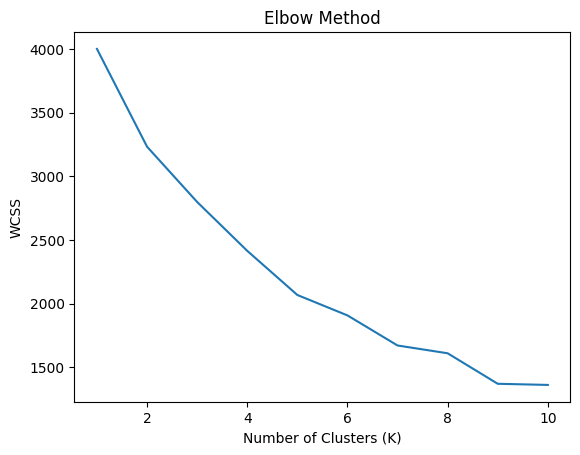

K = 2, Silhouette Score = 0.18834047470406826
K = 3, Silhouette Score = 0.16931350191294225
K = 4, Silhouette Score = 0.18835321856070286
K = 5, Silhouette Score = 0.2082659655399744
K = 6, Silhouette Score = 0.20090635317635294
K = 7, Silhouette Score = 0.21740815490051243
K = 8, Silhouette Score = 0.20854711755557548
K = 9, Silhouette Score = 0.2389506212423466
K = 10, Silhouette Score = 0.21610936984223883


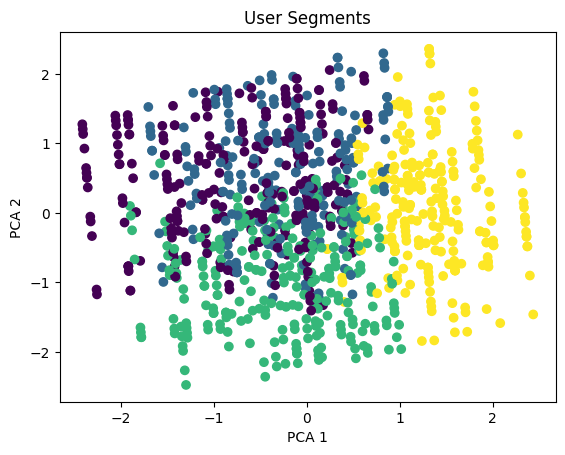

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.DataFrame(data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K = {k}, Silhouette Score = {score}")

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("User Segments")
plt.show()